# Code for Plots, Heatmaps, Etc

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10,6)})
sns.set(font_scale = 1.25)

# Plots

### Reading Training Dynamics

In [13]:
df_n_100 = pd.read_csv("models/ncvx_nn4096_solversgd_l1e-3_EPOCHS100_Results.csv",index_col=[0])
df_n_P25 = pd.read_csv("models/ncvx_5at80_solversgd_l1e-3_ROUNDS5_EPOCHS25_POST_Results.csv",index_col=[0])
df_n_P100 = pd.read_csv("models/ncvx_5at80_solversgd_l1e-3_ROUNDS5_EPOCHS100_POST_Results.csv",index_col=[0])
df_n_100['nonzero_perc'] = 100
df_n_100['Convexity'] = "Non-Convex, Pre-Training"
df_n_P25['Convexity'] = "Non-Convex, Lottery"
df_n_P100['Convexity'] = "Non-Convex, Lottery"
df_n_P25['round'] = df_n_P25['round']+1
df_n_P100['round'] = df_n_P100['round']+1



df_c_100 = pd.read_csv("models/cvx_nn4096_solversgd_lr5e-7_EPOCHS100_Results.csv",index_col=[0])
df_c_P25 = pd.read_csv("models/cvx_5at80_solversgd_lr5e-7_ROUNDS5_EPOCHS25_Results.csv",index_col=[0])
df_c_P100 = pd.read_csv("models/cvx_5at80_solversgd_lr5e-7_ROUNDS5_EPOCHS100_Results.csv",index_col=[0])
df_c_100['nonzero_perc'] = 100
df_c_100["Convexity"] = "Convex"
df_c_P25["Convexity"] = "Convex"
df_c_P100["Convexity"] = "Convex"
df_c_P25['round'] = df_c_P25['round']+1
df_c_P100['round'] = df_c_P100['round']+1

,losses,accs,losses_test,accs_test,times,epoch,round,nonzero_perc,Convexity
0,0.743101,0.247,0.517727,0.2918,3.350060,0,1,20.0,"Non-Convex, Lottery"
1,0.733137,0.224,0.517727,0.2918,1.103052,0,1,20.0,"Non-Convex, Lottery"
2,0.690469,0.237,0.517727,0.2918,1.113010,0,1,20.0,"Non-Convex, Lottery"
3,0.681462,0.231,0.517727,0.2918,1.061966,0,1,20.0,"Non-Convex, Lottery"
4,0.638209,0.271,0.517727,0.2918,1.074976,0,1,20.0,"Non-Convex, Lottery"
...,...,...,...,...,...,...,...,...,...
24995,0.462893,0.218,0.458790,0.2278,1.090603,99,5,0.0,"Non-Convex, Lottery"
24996,0.460193,0.216,0.458790,0.2278,1.037944,99,5,0.0,"Non-Convex, Lottery"
24997,0.459259,0.238,0.458790,0.2278,1.042949,99,5,0.0,"Non-Convex, Lottery"
24998,0.458713,0.230,0.458790,0.2278,1.048459,99,5,0.0,"Non-Convex, Lottery"


In [8]:
def one_shot_plot(df,title,val="Accuracy",ylim=None):
    df = df.melt(id_vars=["epoch","Convexity"],value_vars=[f"Train {val}",f"Test {val}"],var_name="Train/Test",value_name=val)
    ax = sns.lineplot(data=df,x="epoch",y=val,hue="Convexity",style="Train/Test")
    ax.set_title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if ylim is not None:
        ax.set_ylim(ylim)
    plt.show()

## Plotting Training Dynamics
### One-Shot Pruning

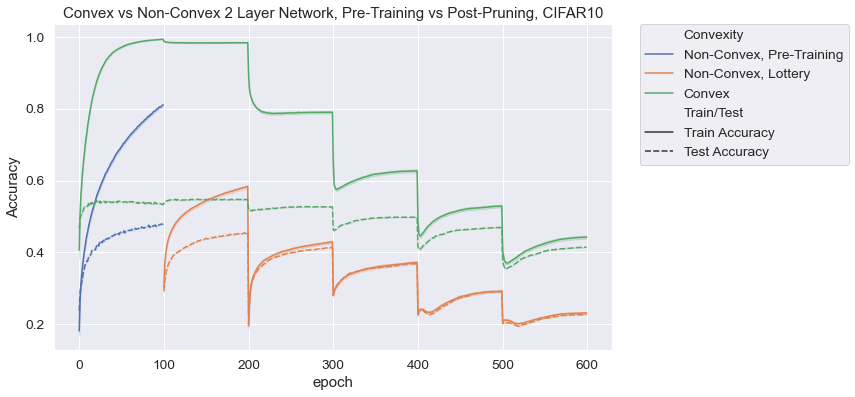

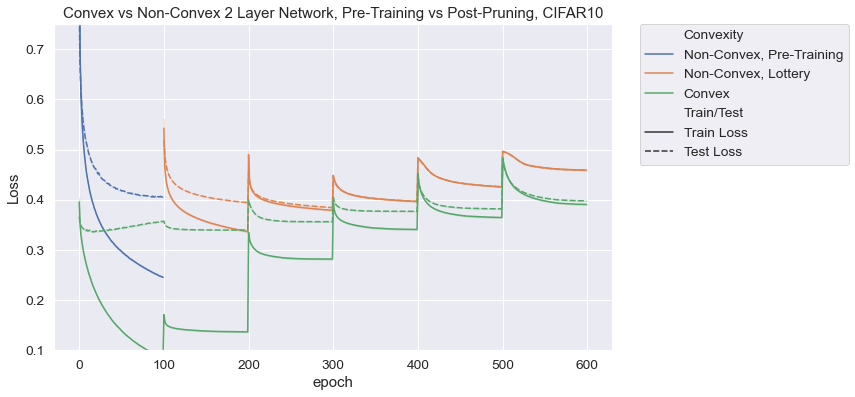

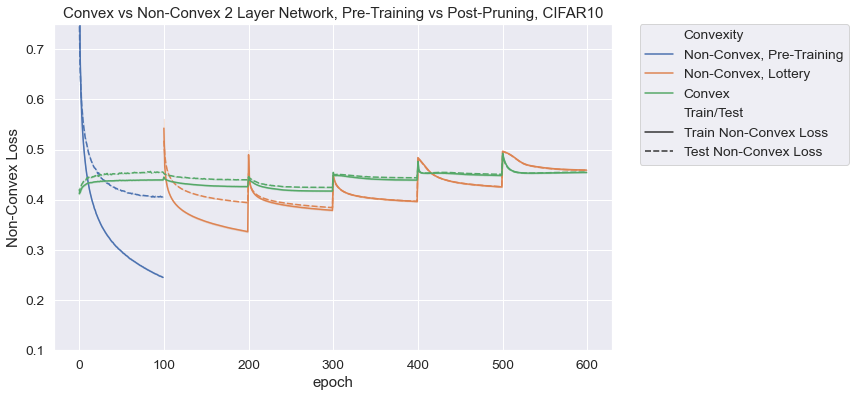

,Train Loss,Train Accuracy,Test Loss,Test Accuracy,times,epoch,round,Nonzero %,Convexity,Train Non-Convex Loss,Test Non-Convex Loss
0,3.977049,0.086,0.778654,0.2374,3.046771,0,0,100.0,"Non-Convex, Pre-Training",3.977049,0.778654
1,2.503469,0.085,0.778654,0.2374,1.031938,0,0,100.0,"Non-Convex, Pre-Training",2.503469,0.778654
2,2.357873,0.092,0.778654,0.2374,0.997907,0,0,100.0,"Non-Convex, Pre-Training",2.357873,0.778654
3,3.063090,0.116,0.778654,0.2374,0.977348,0,0,100.0,"Non-Convex, Pre-Training",3.063090,0.778654
4,2.397407,0.118,0.778654,0.2374,0.989153,0,0,100.0,"Non-Convex, Pre-Training",2.397407,0.778654
...,...,...,...,...,...,...,...,...,...,...,...
59995,0.385721,0.444,0.397815,0.4149,1.212678,599,5,0.0,Convex,0.450368,0.455078
59996,0.386723,0.466,0.397815,0.4149,1.224128,599,5,0.0,Convex,0.455026,0.455078
59997,0.383493,0.486,0.397815,0.4149,1.240252,599,5,0.0,Convex,0.449859,0.455078
59998,0.388865,0.446,0.397815,0.4149,1.213224,599,5,0.0,Convex,0.454862,0.455078


In [14]:
df = pd.concat((df_n_100,df_n_P100,df_c_100,df_c_P100),ignore_index=True)
df.loc[df["Convexity"] != "Convex","noncvx_losses"] = df.loc[df["Convexity"] != "Convex","losses"]
df.loc[df["Convexity"] != "Convex","noncvx_losses_test"] = df.loc[df["Convexity"] != "Convex","losses_test"]
df["epoch"] = df["epoch"] + 100*np.maximum(df["round"]-1,0) + 100*(df["round"] > 0)
df = df.rename(columns={"nonzero_perc":"Nonzero %", "accs":"Train Accuracy", "accs_test":"Test Accuracy",
                        "losses":"Train Loss", "losses_test":"Test Loss", "noncvx_losses":"Train Non-Convex Loss",
                        "noncvx_losses_test":"Test Non-Convex Loss"})

def one_shot_plot(df,title,val="Accuracy",ylim=None):
    df = df.melt(id_vars=["epoch","Convexity"],value_vars=[f"Train {val}",f"Test {val}"],var_name="Train/Test",value_name=val)
    ax = sns.lineplot(data=df,x="epoch",y=val,hue="Convexity",style="Train/Test")
    ax.set_title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if ylim is not None:
        ax.set_ylim(ylim)
    plt.show()
    

one_shot_plot(df,"Convex vs Non-Convex 2 Layer Network, Pre-Training vs Post-Pruning, CIFAR10")
one_shot_plot(df,"Convex vs Non-Convex 2 Layer Network, Pre-Training vs Post-Pruning, CIFAR10","Loss",[0.1,0.75])
one_shot_plot(df,"Convex vs Non-Convex 2 Layer Network, Pre-Training vs Post-Pruning, CIFAR10","Non-Convex Loss",[0.1,0.75])

df

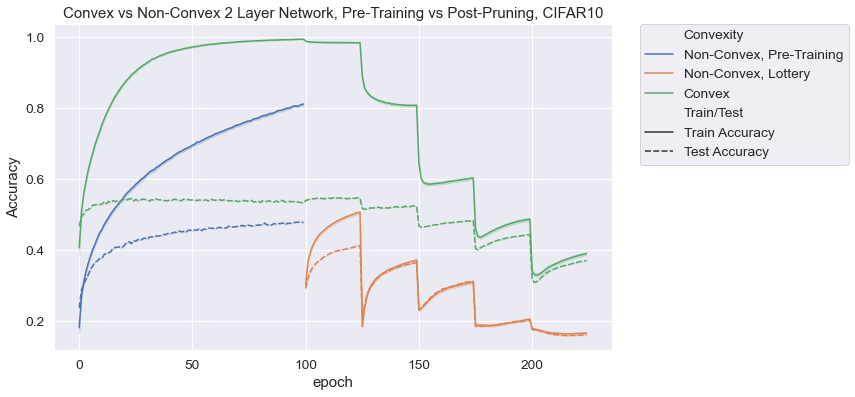

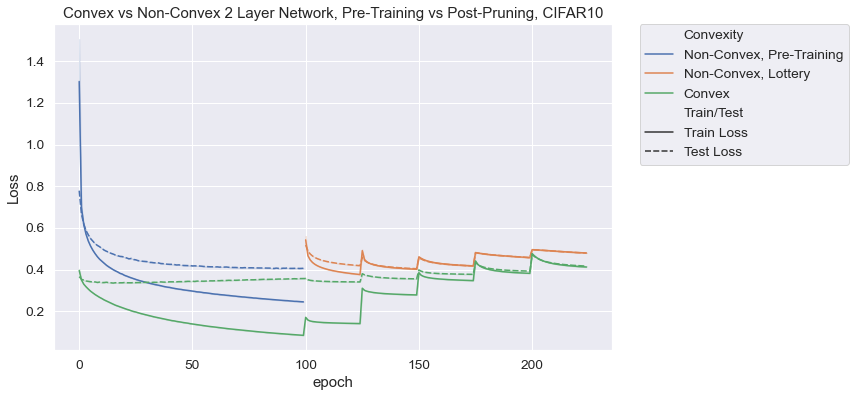

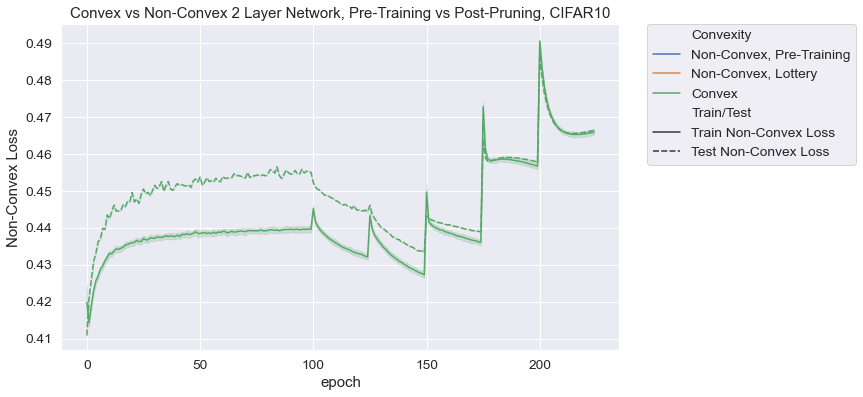

,Train Loss,Train Accuracy,Test Loss,Test Accuracy,times,epoch,round,Nonzero %,Convexity,Train Non-Convex Loss,Test Non-Convex Loss
0,3.977049,0.086,0.778654,0.2374,3.046771,0,0,100.0,"Non-Convex, Pre-Training",NaN,NaN
1,2.503469,0.085,0.778654,0.2374,1.031938,0,0,100.0,"Non-Convex, Pre-Training",NaN,NaN
2,2.357873,0.092,0.778654,0.2374,0.997907,0,0,100.0,"Non-Convex, Pre-Training",NaN,NaN
3,3.063090,0.116,0.778654,0.2374,0.977348,0,0,100.0,"Non-Convex, Pre-Training",NaN,NaN
4,2.397407,0.118,0.778654,0.2374,0.989153,0,0,100.0,"Non-Convex, Pre-Training",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
22495,0.412707,0.404,0.416870,0.3702,1.240639,224,5,0.0,Convex,0.468665,0.466439
22496,0.408032,0.409,0.416870,0.3702,1.209008,224,5,0.0,Convex,0.465263,0.466439
22497,0.413938,0.375,0.416870,0.3702,1.235123,224,5,0.0,Convex,0.468625,0.466439
22498,0.414952,0.380,0.416870,0.3702,1.202135,224,5,0.0,Convex,0.466628,0.466439


In [15]:
df = pd.concat((df_n_100,df_n_P25,df_c_100,df_c_P25),ignore_index=True)
df.loc[df["Convexity"] == "Non-Convex","noncvx_losses"] = df.loc[df["Convexity"] == "Non-Convex","losses"]
df.loc[df["Convexity"] == "Non-Convex","noncvx_losses_test"] = df.loc[df["Convexity"] == "Non-Convex","losses_test"]
df["epoch"] = df["epoch"] + 25*np.maximum(df["round"]-1,0) + 100*(df["round"] > 0)
df = df.rename(columns={"nonzero_perc":"Nonzero %", "accs":"Train Accuracy", "accs_test":"Test Accuracy",
                        "losses":"Train Loss", "losses_test":"Test Loss", "noncvx_losses":"Train Non-Convex Loss",
                        "noncvx_losses_test":"Test Non-Convex Loss"})

one_shot_plot(df,"Convex vs Non-Convex 2 Layer Network, Pre-Training vs Post-Pruning, CIFAR10")
one_shot_plot(df,"Convex vs Non-Convex 2 Layer Network, Pre-Training vs Post-Pruning, CIFAR10","Loss")
one_shot_plot(df,"Convex vs Non-Convex 2 Layer Network, Pre-Training vs Post-Pruning, CIFAR10","Non-Convex Loss")

df

# Heat Maps
Maps O' Heat

In [17]:
class FCNetwork(nn.Module):
    def __init__(self, num_neurons=4096, num_classes=10, input_dim=3072):
        self.num_classes = num_classes
        super(FCNetwork, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(input_dim, num_neurons, bias=False), nn.ReLU())
        self.layer2 = nn.Linear(num_neurons, num_classes, bias=False)

    def forward(self, x):
        x = x.reshape(x.size(0), -1)
        out = self.layer2(self.layer1(x))
        return out
    
class custom_cvx_layer(torch.nn.Module):
    def __init__(self, num_neurons=4096, num_classes=10, input_dim=3072):
        self.num_classes = num_classes
        super(custom_cvx_layer, self).__init__()
        
        # (num_neurons) P x (input_dim) d x (num_classes) C
        self.weight_v = torch.nn.Parameter(data=torch.zeros(num_neurons, input_dim, num_classes), requires_grad=True)
        self.weight_w = torch.nn.Parameter(data=torch.zeros(num_neurons, input_dim, num_classes), requires_grad=True)

    def forward(self, x, sign_patterns):
        sign_patterns = sign_patterns.unsqueeze(2)
        x = x.view(x.shape[0], -1) # n x d
        
        Xv_w = torch.matmul(x, self.weight_v - self.weight_w) # P x N x C
        
        # for some reason, the permutation is necessary. not sure why
        DXv_w = torch.mul(sign_patterns, Xv_w.permute(1, 0, 2)) #  N x P x C
        y_pred = torch.sum(DXv_w, dim=1, keepdim=False) # N x C
        
        return y_pred
    
def get_param_dict(filename):
    if 'ncvx' in filename:
        model = FCNetwork() # Deal with different params eventually
    else:
        model = custom_cvx_layer()
    model.load_state_dict(torch.load(filename))
    return (model.state_dict(), model)

In [19]:
n_100,_ = get_param_dict("models/ncvx_nn4096_solversgd_l1e-3_EPOCHS100.pth")
n_P100,_ = get_param_dict("models/ncvx_5at80_solversgd_l1e-3_ROUNDS5_EPOCHS100_POST.pth")
n_P25,_ = get_param_dict("models/ncvx_5at80_solversgd_l1e-3_ROUNDS5_EPOCHS25_POST.pth")

c_100,_ = get_param_dict("models/cvx_nn4096_solversgd_lr5e-7_EPOCHS100.pth")
c_P100,_ = get_param_dict("models/cvx_5at80_solversgd_lr5e-7_ROUNDS5_EPOCHS100.pth")
c_P25,_ = get_param_dict("models/cvx_5at80_solversgd_lr5e-7_ROUNDS5_EPOCHS25.pth")

In [20]:
for name,param in n_100.items():
    print(name, param.shape)
    
for name,param in c_100.items():
    print(name, param.shape)

layer1.0.weight torch.Size([4096, 3072])
layer2.weight torch.Size([10, 4096])
weight_v torch.Size([4096, 3072, 10])
weight_w torch.Size([4096, 3072, 10])


C:\Users\trevo\AppData\Local\Temp\ipykernel_1860\922422439.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


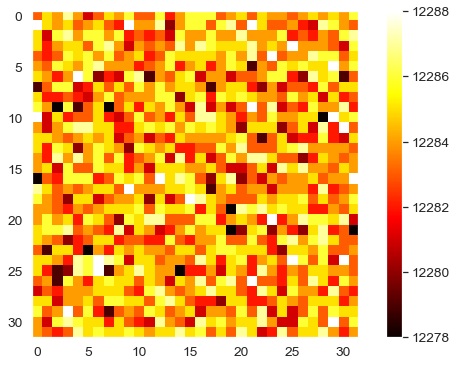

C:\Users\trevo\AppData\Local\Temp\ipykernel_1860\922422439.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


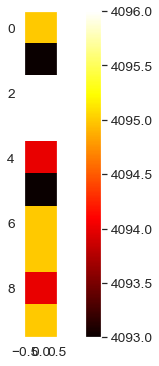

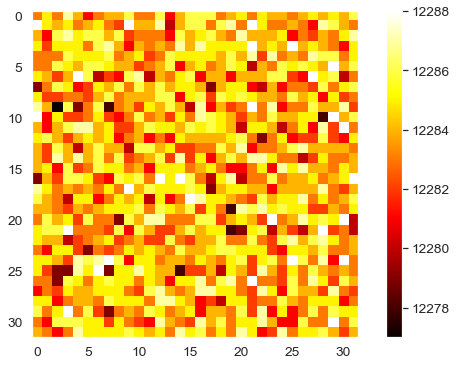

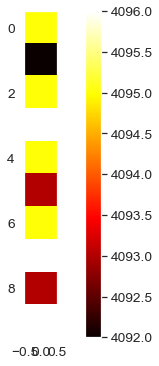

In [21]:
def ncvx_heatmap(m,EPS=1e-12):
    l = [l.numpy() for l in m.values()]
    
    l_in = np.sum(np.abs(l[0].reshape((l[0].shape[0],32,32,3))) < EPS,axis=0)    
    plt.grid(False)
    plt.imshow(np.sum(l_in,axis=2), cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.show()
    
    l_out = np.sum(np.abs(l[1].T) < EPS,axis=0)
    plt.grid(False)
    plt.imshow(np.expand_dims(l_out,axis=1), cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.show()
ncvx_heatmap(n_P100)
ncvx_heatmap(n_P25)

125789107 125788854


C:\Users\trevo\AppData\Local\Temp\ipykernel_1860\3630846705.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


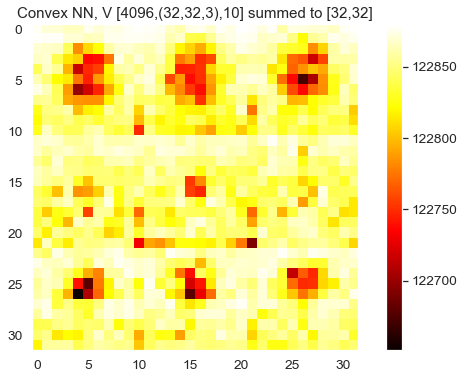

C:\Users\trevo\AppData\Local\Temp\ipykernel_1860\3630846705.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


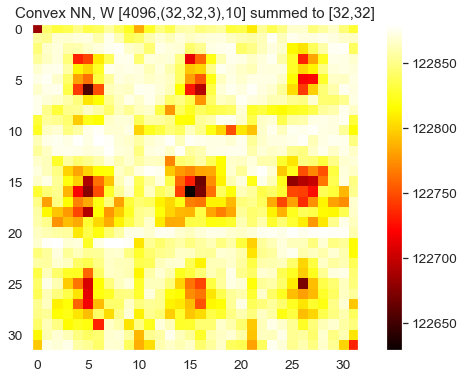

125789001 125788854


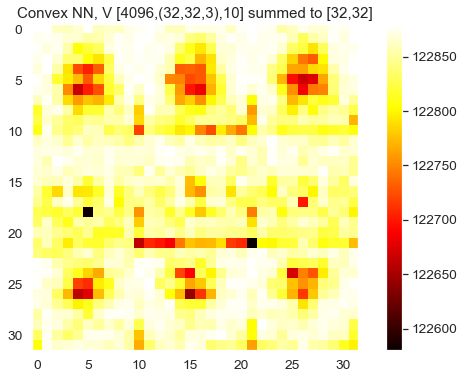

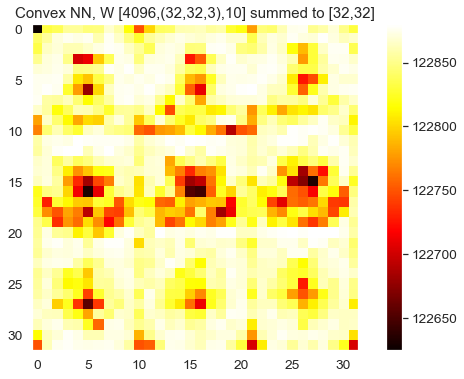

In [22]:
#[4096, 3072, 10]

def cvx_heatmap(m,EPS=1e-12):
    l = [l.numpy() for l in m.values()]
    # FIX
    
    l1 = np.sum(np.sum(np.abs(l[0] < EPS),axis=2).reshape(l[0].shape[0],32,32,3),axis=0)
    l2 = np.sum(np.sum(np.abs(l[1]) < EPS,axis=2).reshape(l[1].shape[0],32,32,3),axis=0)
    print(np.sum(l1), np.sum(l2))
    
    plt.grid(False)
    plt.imshow(np.sum(l1,axis=2), cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title("Convex NN, V [4096,(32,32,3),10] summed to [32,32]")
    plt.show()
    
    plt.grid(False)
    plt.imshow(np.sum(l2,axis=2), cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title("Convex NN, W [4096,(32,32,3),10] summed to [32,32]")
    plt.show()
    
cvx_heatmap(c_P100)
cvx_heatmap(c_P25)